# Solving a regression problem using gradient descent 

The purpose of this notebook is gain better understanding how gradient descent works.

Imports:

In [8]:
import numpy as np
from matplotlib import pyplot as plt, animation, rc

Define the regression function. Currently, the regression function is alpha+beta\*x. You should change it to alpha+beta\*x+gamma \* x\*\*2.

In [9]:
def regression_function(alpha,beta,gamma,x): 
    return alpha + beta*x + gamma* x**2

Generate artificial data using the "true" values of the regression parameters. The random seed is set to a specific value to ensure reproducibility of the results. Use gamma_true = 32.0 for the data generation process. Do not modify any parameters so that the homework submission form correctly validates your results. But of couse for your own learning purposes, you are encourages to modify the parameter values and see the consequences of the changes.

In [10]:
number_of_observations = 50

alpha_true = 3.0
beta_true = -20.0
gamma_true = 32.0
noise_standard_deviation = 0.25

np.random.seed(0)

x_data = np.random.random(number_of_observations)
y_data = (regression_function(alpha_true,beta_true,gamma_true,x_data)
          +noise_standard_deviation*np.random.randn(number_of_observations))

Plot the generated data. The setup of this figure is later used to create an animation of the optimization process.

Do not modify y-axis range of the figure. The data will nicely fit when you include the quadratic terms.

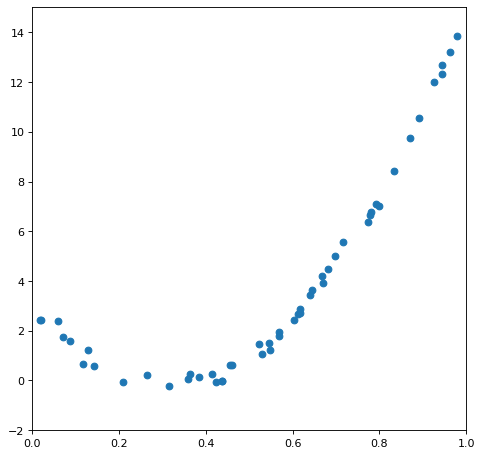

In [11]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1)) 
# Do not modify the following values.
# The data will nicely fit when you include the quadratic terms.
ax.set_ylim((-2,15)) 
plt.scatter(x_data,y_data)
line_thickness = 2
line, = ax.plot([],[],lw=line_thickness)

Specify an initial guess for the regression parameter value. Please use gamma_initial_guess = -8.0.

In [15]:
alpha_initial_guess = 3.
beta_initial_guess = -2.
gamma_initial_guess = -8.

Choose a learning rate and an animation characteristic.

In [16]:
learning_rate = 0.05
number_of_gradient_descent_steps_per_frame = 50

Specify functions that perform a gradient descent step and functions used for creating an animation of the optimization process. The gradient_descent_step function is written for a linear regression function. Adjust it so that it works for quadratic regression functions of the form alpha+beta\*x+gamma \* x\*\*2. 

In [17]:
def gradient_descent_step():
    global alpha, beta, gamma
    y_predicted = regression_function(alpha,beta,gamma,x_data)
    derivative_of_loss_wrt_alpha = (2*(y_predicted-y_data)).mean()
    derivative_of_loss_wrt_beta = (2*x_data*(y_predicted-y_data)).mean()
    derivative_of_loss_wrt_gamma = (2*(x_data**2)*(y_predicted-y_data)).mean()
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha
    beta = beta - learning_rate*derivative_of_loss_wrt_beta
    gamma = gamma - learning_rate*derivative_of_loss_wrt_gamma

def frame_evaluation(_):
    x_plotting = np.linspace(0,1,51)
    y_plotting = regression_function(alpha,beta,gamma,x_plotting)
    line.set_data(x_plotting,y_plotting)
    for _ in range(number_of_gradient_descent_steps_per_frame): 
        gradient_descent_step()
    return (line,)

Set up the animation.

In [18]:
rc('animation',html='html5')
number_of_frames = 250
frame_interval = 100
resulting_animation = animation.FuncAnimation(
    fig,frame_evaluation,np.arange(0,number_of_frames),interval=frame_interval)

Set the regression parameter values to the initial guesses. Run the optimization process, capture it as an animation, and display it in the notebook.

In [19]:
alpha = alpha_initial_guess
beta = beta_initial_guess
gamma = gamma_initial_guess

resulting_animation

Print the final parameter values. Include also gamma.

In [20]:
print('alpha: ',alpha)
print('beta: ',beta)
print('gamma: ', gamma)

alpha:  2.805837875549414
beta:  -19.026885872750558
gamma:  30.97427390241038


Save the animation as an mp4 file to the working directory. (Requires resetting the initial values of the parameters.)

In [11]:
alpha = alpha_initial_guess
beta = beta_initial_guess

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist=''), bitrate=1800)
resulting_animation.save('resulting_animation.mp4', writer=writer)